데이터 확인
- info
- shape
- dtypes
- describe
- isna().sum()

데이터값 확인
- df.corr()
- pd.plotting.scatter_matrix(df)
- df.plot() - 값의 스케일이 너무 달라서 표현이 잘 안되면 df.drop(columns=['Ash']).plot()
- df.hist()
- df.boxplot() - 이상치 확인

그래프 그리기
- 카테고리 - value_counts() > pie(), bar(), barh()
- 분포 - plot(), hist()

카테고리 그룹별로
- df.groupby(컬럼).mean()
- df.groupby(컬럼).aggregate(['mean', 'max'])

컬럼 2개의 관계
- df.plot.scatter

원핫인코딩

x, y분리

score 측정

어떤 변수가 큰영향이 있나

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
adult = pd.read_csv('./datasets/adult/adult.data', header=None)
adult.shape

(32561, 15)

In [52]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [54]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
adult['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [57]:
adult['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [58]:
adult['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [59]:
adult['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [60]:
adult['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [74]:
adult['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [64]:
adult['occupation'] = adult['occupation'].replace('?', np.NaN)

In [72]:
adult = adult.dropna()

In [73]:
adult['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
adult['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [28]:
adult['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [29]:
adult['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [43]:
adult['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [30]:
adult['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [31]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [34]:
adult_change = pd.get_dummies(adult)

In [36]:
adult_change.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.056386,0.029483,0.064279,0.000215,...,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491,0.759190,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.230670,0.169159,0.245254,0.014661,...,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162,0.427581,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
adult_change.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.042627,0.051227,0.060901,-0.019362,...,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375,-0.234037,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.002923,-0.007525,-0.002828,0.005031,...,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501,0.009463,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,-0.077946,0.060518,0.097941,-0.015117,...,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-7.483035e-03,-0.001234,-0.335154,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-3.161506e-02,0.078409,-0.015585,-0.005768,-0.007007,-0.002140,...,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193,-0.223329,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000e+00,0.054256,-0.016102,0.010798,0.014668,-0.003177,...,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804,-0.150526,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,5.425636e-02,1.000000,-0.168640,0.013293,0.011576,-0.014262,...,0.001264,0.007938,-0.004988,0.009537,-0.006006,0.002446,-1.137917e-02,0.007408,-0.229689,0.229689
workclass_ ?,0.042627,-0.002923,-0.077946,-0.015585,-1.610248e-02,-0.168640,1.000000,-0.042606,-0.064070,-0.003585,...,0.002243,0.012073,0.020619,-0.000085,-0.000393,0.006193,-2.285582e-03,-0.005420,0.078198,-0.078198
workclass_ Federal-gov,0.051227,-0.007525,0.060518,-0.005768,1.079841e-02,0.013293,-0.042606,1.000000,-0.045682,-0.002556,...,-0.003347,-0.004983,-0.006903,-0.004099,-0.004212,0.015441,9.868459e-05,-0.003865,-0.059372,0.059372
workclass_ Local-gov,0.060901,-0.002828,0.097941,-0.007007,1.466771e-02,0.011576,-0.064070,-0.045682,1.000000,-0.003843,...,-0.005033,-0.013007,-0.004048,-0.006164,-0.001148,0.033196,-3.611051e-03,-0.000161,-0.033091,0.033091
workclass_ Never-worked,-0.019362,0.005031,-0.015117,-0.002140,-3.177054e-03,-0.014262,-0.003585,-0.002556,-0.003843,1.000000,...,-0.000282,-0.000728,-0.000581,-0.000345,-0.000354,0.005000,-6.658596e-04,-0.000325,0.008259,-0.008259


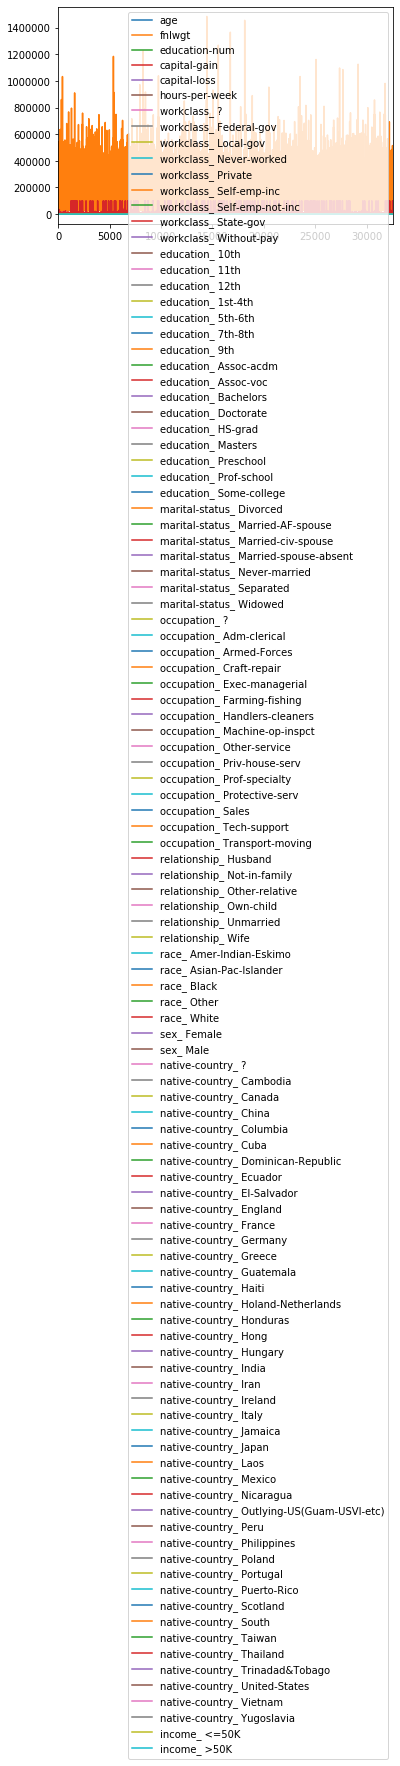

In [40]:
ｙ　＝　ａｄｕｌｔ＿ｃｈａｎｇｅ＿ｉｌｏｃ［：，　－１］
ｘ　＝　ａｄｕｌｔ＿ｃｈａｎｇｅ＿ｉｌｏｃ［：，　：－２］

ｆｒｏｍ　ｓｋｌｅａｒｎ．ｌｉｎｅａｒ＿ｍｏｄｅｌ　ｉｍｐｏｒｔ　ＬｏｇｉｓｔｉｃＲｅｇｒｅｓｓｉｏｎ
ｍｏｄｅｌ　＝　ＬｏｇｉｓｔｉｃＲｅｇｒｅｓｓｉｏｎ（ｘ，　ｙ）
ｍｏｄｅｌ．ｓｃｏｒｅ（ｘ，　ｙ）

ｍｏｄｅｌ，ｃｏｅｆ＿